In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# from xgboost import XGBClassifier

In [9]:
train = pd.read_csv('data/train.csv').set_index('user_id')
test = pd.read_csv('data/test.csv').set_index('user_id')
submission = pd.read_csv('data/sample_submission.csv')

In [10]:
display(train.head(2))
display(test.head(2))

,label,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,20972,14,13,3,11,1,2,15,26,...,0,0,0,0,0,0,0,0,1,0
2,0,7362,213,71,3,11,1,2,15,26,...,0,0,0,0,0,0,0,0,0,0


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
user_id,,,,,,,,,,,,,,,,,,,,,
57,19364,213,51,2,8,1,2,15,26,48955,...,0,0,0,0,0,0,0,0,0,0
58,16000,212,13,3,11,1,2,15,26,48955,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,458798.0,0.026855,0.161660,0.0,0.0,0.0,0.0,1.0
X1,458798.0,10850.591243,7078.656632,1.0,4692.0,11574.0,16425.0,24234.0
X2,458798.0,154.947696,67.952267,1.0,95.0,189.0,213.0,222.0
X3,458798.0,28.107965,19.227303,1.0,13.0,14.0,37.0,94.0
X4,458798.0,2.407831,0.800163,1.0,2.0,3.0,3.0,3.0
X5,458798.0,10.985176,5.527487,1.0,8.0,11.0,16.0,17.0
X6,458798.0,3.215446,0.811902,1.0,3.0,3.0,4.0,4.0
X7,458798.0,5.082675,3.302548,1.0,2.0,5.0,8.0,11.0
X8,458798.0,15.654039,4.993260,1.0,14.0,15.0,21.0,29.0
X9,458798.0,17.663438,6.338223,1.0,14.0,14.0,23.0,38.0


In [12]:
train.info() #no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458798 entries, 1 to 482935
Data columns (total 52 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   label   458798 non-null  int64  
 1   X1      458798 non-null  int64  
 2   X2      458798 non-null  int64  
 3   X3      458798 non-null  int64  
 4   X4      458798 non-null  int64  
 5   X5      458798 non-null  int64  
 6   X6      458798 non-null  int64  
 7   X7      458798 non-null  int64  
 8   X8      458798 non-null  int64  
 9   X9      458798 non-null  int64  
 10  X10     458798 non-null  int64  
 11  X11     458798 non-null  int64  
 12  X12     458798 non-null  int64  
 13  X13     458792 non-null  float64
 14  X14     458798 non-null  int64  
 15  X15     458798 non-null  int64  
 16  X16     458798 non-null  int64  
 17  X17     458798 non-null  int64  
 18  X18     458798 non-null  int64  
 19  X19     458798 non-null  int64  
 20  X20     458798 non-null  int64  
 21  X21     45

In [13]:
ss = StandardScaler()
scaled_list = []
for col in train.columns:
    if train[col].mean()> 5:
        scaled_list.append(col)
        train[col] = ss.fit_transform(train[[col]])
        test[col] = ss.transform(test[[col]])
        
print(scaled_list)

['X1', 'X2', 'X3', 'X5', 'X7', 'X8', 'X9', 'X10', 'X16', 'X18', 'X21', 'X22']


In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,458798.0,2.685496e-02,0.161660,0.000000,0.000000,0.000000,0.000000,1.000000
X1,458798.0,-2.685842e-17,1.000001,-1.532721,-0.870024,0.102196,0.787496,1.890673
X2,458798.0,2.233562e-16,1.000001,-2.265529,-0.882204,0.501121,0.854311,0.986757
X3,458798.0,7.546839e-17,1.000001,-1.409870,-0.785757,-0.733747,0.462470,3.427007
X4,458798.0,2.407831e+00,0.800163,1.000000,2.000000,3.000000,3.000000,3.000000
X5,458798.0,7.917754e-18,1.000001,-1.806461,-0.540061,0.002682,0.907253,1.088167
X6,458798.0,3.215446e+00,0.811902,1.000000,3.000000,3.000000,4.000000,4.000000
X7,458798.0,1.201330e-16,1.000001,-1.236221,-0.933424,-0.025034,0.883357,1.791748
X8,458798.0,1.383303e-16,1.000001,-2.934767,-0.331255,-0.130985,1.070637,2.672798
X9,458798.0,-5.988068e-17,1.000001,-2.629042,-0.577992,-0.577992,0.841966,3.208562


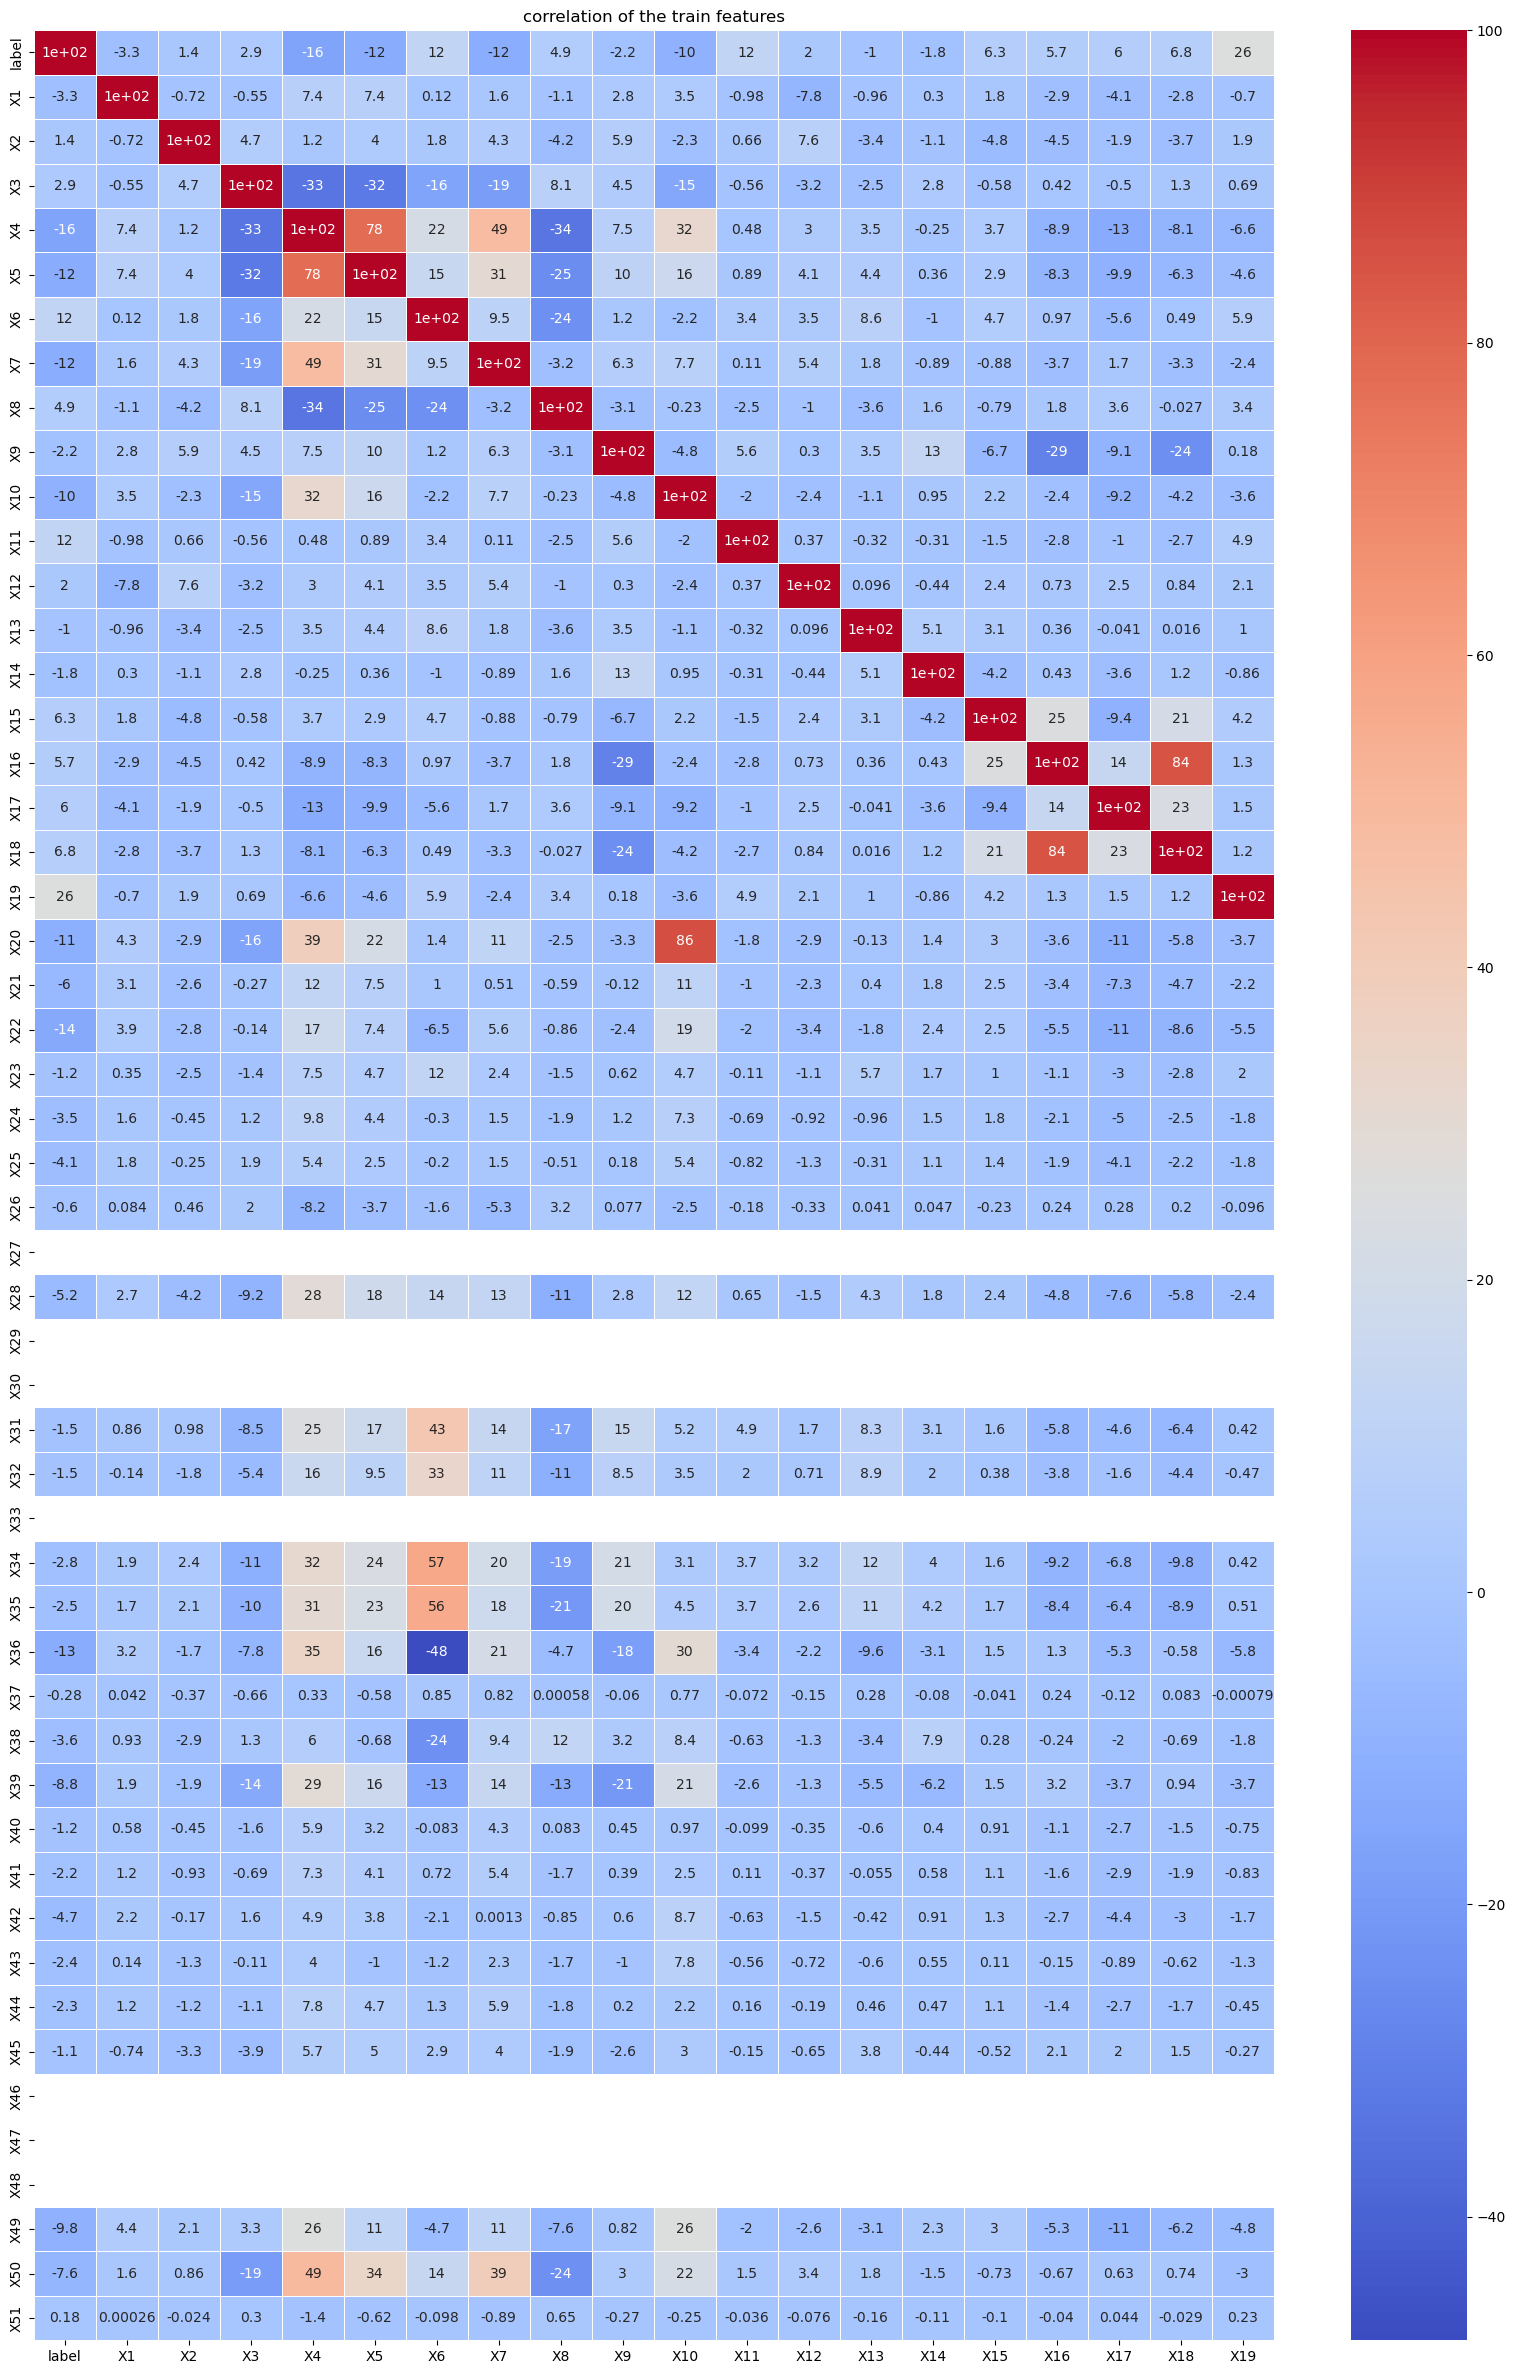

In [15]:
plt.figure(figsize = (20, 30))
sns.heatmap((train.corr()*100)[:20].T, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('correlation of the train features')
plt.show()

In [16]:
train[['X27', 'X29', 'X30', 'X33', 'X46', 'X47', 'X48']].head(5) #manually checking features that appear white on the 

,X27,X29,X30,X33,X46,X47,X48
user_id,,,,,,,
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


In [17]:
for i in ['X27', 'X29', 'X30', 'X33', 'X46', 'X47', 'X48']:
    print(f'{i} --------- {train[i].nunique()}')

X27 --------- 1
X29 --------- 1
X30 --------- 1
X33 --------- 1
X46 --------- 1
X47 --------- 1
X48 --------- 1


In [18]:
train = train.drop(['X27', 'X29', 'X30', 'X33', 'X46', 'X47', 'X48'], axis = 1)
test = test.drop(['X27', 'X29', 'X30', 'X33', 'X46', 'X47', 'X48'], axis = 1)
#they are redundant to the model, hence dropped

In [19]:
train.corr()[abs((train.corr()*100))['label'] < 1].index  #features with less than 1% correlation, also redundant

Index(['X26', 'X37', 'X51'], dtype='object')

In [20]:
train.X13 = train['X13'].fillna(train['X13'].median())
train.isnull().sum().sum()

0

In [21]:
y = train.pop('label')
X = train

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
model = RandomForestClassifier()

In [ ]:
model = XGBClassifier()
params = {'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0],
         'max_depth': [2,4,6,8,10],
          'min_child_weight': [1,3,5,7],
          'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
          'colsample_bytree': [0.2, 0.4, 0.6]
         }
model1 = RandomizedSearchCV(model, params, n_iter = 5, cv = 5, random_state = 10)
model2 = RandomizedSearchCV(model, params, n_iter = 5, cv = 5, random_state = 10)

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
pred = model.predict(X_test)
score = f1_score(pred, y_test)
print('score: ', score)

score:  0.6747902516979624


In [26]:
model2.fit(X, y)

NameError: name 'model2' is not defined

In [27]:
pred = model.predict(X_test)
score = f1_score(pred, y_test)
print('score: ', score)

score:  0.6747902516979624


In [28]:
prediction = model.predict(test)
submission['prediction']  = prediction
submission.pop('label')
submission.to_csv('spammer_submission1.csv', index = False)

In [29]:
submission

,user_id,prediction
0,57,0
1,58,0
2,59,0
3,60,0
4,61,0
...,...,...
24143,482942,0
24144,482943,0
24145,482944,0
24146,482945,0


In [ ]:
submission.shape